In [1]:
import numpy as np
import sys
sys.path.append("../../..")
from utils.plotFunction import plotFunction
from utils.plotSimulationConvergence import plotSimulationConvergence, plotRelativeError
from matplotlib import pyplot as plt
from tqdm import tqdm

In [2]:
def f(x):
    return np.e**(-x**2)

Text(0, 0.5, 'g(x) = e^(-x^2)')

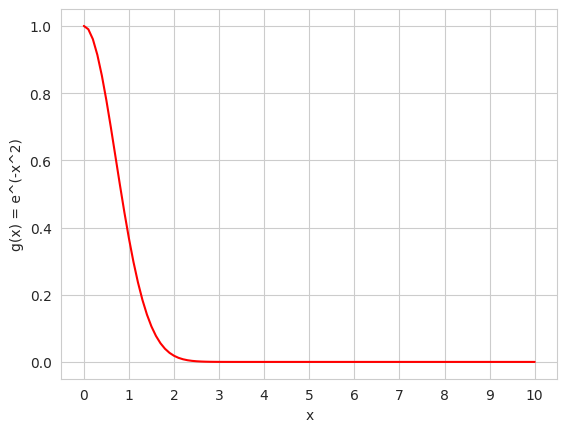

In [3]:
a = 0
b = 10
plotFunction(f, a, b, 100)
plt.xticks(range(a, b + 1, 1))
plt.xlabel("x")
plt.ylabel("g(x) = e^(-x^2)")

In [4]:
def f(x):
    value = np.e**(-x**2)
    return value

def samplerPDF(x):
    value = np.e**(1-x)/(np.e - 1)
    return value

def samplerFunction():
    u = np.random.rand()
    x = 1 - np.log(np.e - (np.e -1)*u)
    return x

In [5]:
def importanceSampling(n, f, samplerPDF, samplerFunction):
    """It returns an approximation for the expected value E_h[f(x)/h(x)] from n random samples drawn by "samplerFunction", whose probability density function is given by "samplerPDF"."""
    f = np.vectorize(f)
    samplerPDF = np.vectorize(samplerPDF)
    samples = np.array([samplerFunction() for i in range(n)])
    f_x = f(samples)
    h_x = samplerPDF(samples)
    terms = f_x/h_x
    sampleMean = terms.mean()
    return sampleMean

100%|██████████| 400/400 [00:03<00:00, 104.02it/s]


(0.7, 0.8)

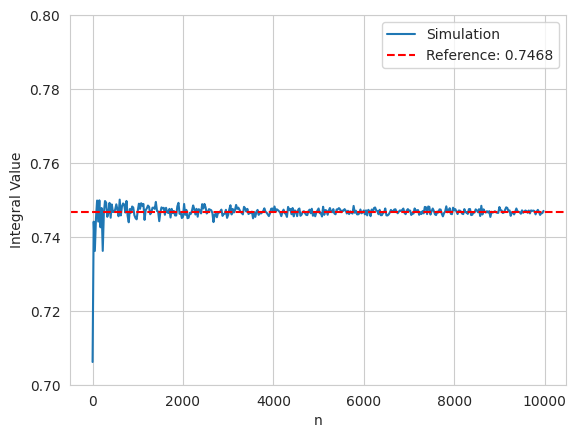

In [6]:
numericalMethodIntegration = 0.746824132 # https://www.integral-calculator.com/
plotSimulationConvergence(
    range(1,10000,25), 
    lambda n: importanceSampling(n, f, samplerPDF, samplerFunction), 
    numericalMethodIntegration
)
plt.ylabel("Integral Value")
plt.ylim([0.7, 0.8])

100%|██████████| 6/6 [00:02<00:00,  2.69it/s]


(0.0, 0.05)

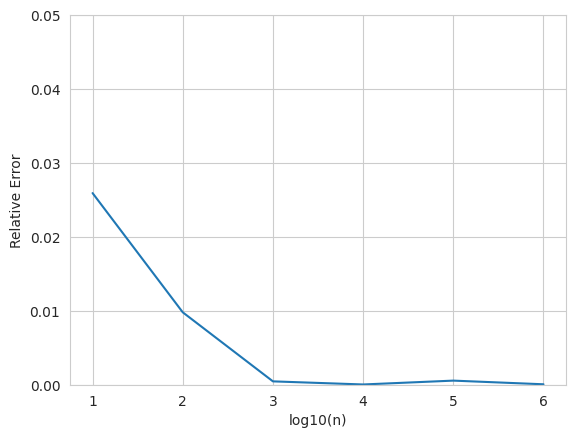

In [30]:
numericalMethodIntegration = 0.746824132 # https://www.integral-calculator.com/
nList = np.array([10**i for i in range(1,7)])
plotRelativeError(
    nList, 
    lambda n: importanceSampling(n, f, samplerPDF, samplerFunction), 
    numericalMethodIntegration
)
plt.xlabel("log10(n)")
plt.xscale("log")
plt.xticks(nList, labels=np.log10(nList).astype("int"))
plt.ylim([0, 0.05])